In [421]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Data preprocessing

In [422]:
df_raw = pd.read_csv('data.csv')
df = df_raw.copy()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [389]:
df = df.drop('Loan_ID', axis=1)

In [390]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [391]:
for col in object_columns:
    df[col] = df[col].astype('category')

df['ApplicantIncome'] = df['ApplicantIncome'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            611 non-null    category
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      582 non-null    category
 5   ApplicantIncome    614 non-null    float64 
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         592 non-null    float64 
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     564 non-null    float64 
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    category
dtypes: category(7), float64(5)
memory usage: 29.2 KB


In [392]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### Dealing with missing values

In [393]:
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [394]:
df.isnull().sum() / len(df)

Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [395]:
float_columns = df.select_dtypes(include=['float']).columns
for col in float_columns:
  df[col] = df[col].fillna(df[col].mean()) 

df = df.dropna()


In [396]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Coding of categorical variables


In [397]:
le = LabelEncoder()
le.fit_transform(df['Loan_Status'])

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [398]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,1


In [399]:
df = pd.get_dummies(data=df, drop_first=True, prefix_sep='-')
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender-Male,Married-Yes,Dependents-1,Dependents-2,Dependents-3+,Education-Not Graduate,Self_Employed-Yes,Property_Area-Semiurban,Property_Area-Urban
0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000.0,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,4106.0,0.0,40.000000,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,8072.0,240.0,253.000000,360.0,1.0,1,1,1,1,0,0,0,0,0,1
612,7583.0,0.0,187.000000,360.0,1.0,1,1,1,0,1,0,0,0,0,1


In [400]:
df['Credit_History'] = df['Credit_History'].astype('int')
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender-Male,Married-Yes,Dependents-1,Dependents-2,Dependents-3+,Education-Not Graduate,Self_Employed-Yes,Property_Area-Semiurban,Property_Area-Urban
0,5849.0,0.0,146.412162,360.0,1,1,1,0,0,0,0,0,0,0,1
1,4583.0,1508.0,128.000000,360.0,1,0,1,1,1,0,0,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1,1,1,1,0,0,0,0,1,0,1
3,2583.0,2358.0,120.000000,360.0,1,1,1,1,0,0,0,1,0,0,1
4,6000.0,0.0,141.000000,360.0,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1,1,0,0,0,0,0,0,0,0,0
610,4106.0,0.0,40.000000,180.0,1,1,1,1,0,0,1,0,0,0,0
611,8072.0,240.0,253.000000,360.0,1,1,1,1,1,0,0,0,0,0,1
612,7583.0,0.0,187.000000,360.0,1,1,1,1,0,1,0,0,0,0,1


### Data normalization

In [401]:
float_columns = df.select_dtypes(include=['float']).columns
float_columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [402]:
scaler = StandardScaler()
df[float_columns.values] = scaler.fit_transform(df[float_columns.values])
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender-Male,Married-Yes,Dependents-1,Dependents-2,Dependents-3+,Education-Not Graduate,Self_Employed-Yes,Property_Area-Semiurban,Property_Area-Urban
0,0.106773,-0.628647,0.017816,0.279009,1,1,1,0,0,0,0,0,0,0,1
1,-0.125510,-0.030757,-0.209480,0.279009,1,0,1,1,1,0,0,0,0,0,0
2,-0.415956,-0.628647,-0.974863,0.279009,1,1,1,1,0,0,0,0,1,0,1
3,-0.492467,0.306250,-0.308240,0.279009,1,1,1,1,0,0,0,1,0,0,1
4,0.134479,-0.628647,-0.048997,0.279009,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.434304,-0.628647,-0.913139,0.279009,1,1,0,0,0,0,0,0,0,0,0
610,-0.213029,-0.628647,-1.295830,-2.504386,1,1,1,1,0,0,1,0,0,0,0
611,0.514646,-0.533492,1.333630,0.279009,1,1,1,1,1,0,0,0,0,0,1
612,0.424925,-0.628647,0.518868,0.279009,1,1,1,1,0,1,0,0,0,0,1


### Splitting Data into Training and Test Sets 

In [403]:
target = df['Loan_Status']
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 554, dtype: int32

In [404]:
data = df.copy()
data.pop('Loan_Status')
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender-Male,Married-Yes,Dependents-1,Dependents-2,Dependents-3+,Education-Not Graduate,Self_Employed-Yes,Property_Area-Semiurban,Property_Area-Urban
0,0.106773,-0.628647,0.017816,0.279009,1,1,0,0,0,0,0,0,0,1
1,-0.125510,-0.030757,-0.209480,0.279009,1,1,1,1,0,0,0,0,0,0
2,-0.415956,-0.628647,-0.974863,0.279009,1,1,1,0,0,0,0,1,0,1
3,-0.492467,0.306250,-0.308240,0.279009,1,1,1,0,0,0,1,0,0,1
4,0.134479,-0.628647,-0.048997,0.279009,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.434304,-0.628647,-0.913139,0.279009,1,0,0,0,0,0,0,0,0,0
610,-0.213029,-0.628647,-1.295830,-2.504386,1,1,1,0,0,1,0,0,0,0
611,0.514646,-0.533492,1.333630,0.279009,1,1,1,1,0,0,0,0,0,1
612,0.424925,-0.628647,0.518868,0.279009,1,1,1,0,1,0,0,0,0,1


In [405]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True)

# Classification Process

## Logistic regression 

In [406]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

### Measuring Performance of Logistic regression model

In [407]:
# accuracy on train set
accuracy = log_reg.score(x_train, y_train)
print(f'Accuracy on train set: {accuracy * 100}%')

Accuracy on train set: 76.86746987951807%


In [408]:
# accuracy on test set
accuracy = log_reg.score(x_test, y_test)
print(f'Accuracy on test set: {accuracy * 100}%')

Accuracy on test set: 75.53956834532374%


### Confusion matrix

Text(0.5, 427.9555555555555, 'Predicted label')

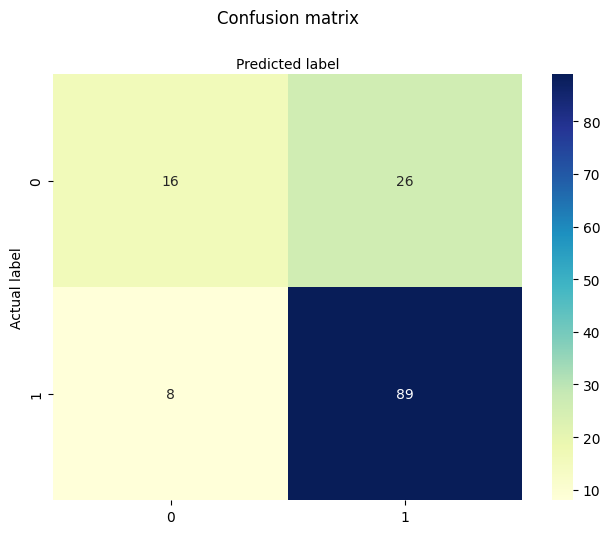

In [409]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Saving the model

In [410]:
pick_in = open('models/Logistic regression.pkl','wb')
pickle.dump(log_reg, pick_in)
pick_in.close()

## Gaussian Naive Bayes 

In [411]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)

### Measuring Performance of Gaussian Naive Bayes model

In [412]:
# accuracy on train set
accuracy = naive_bayes.score(x_train, y_train)
print(f'Accuracy on train set: {accuracy * 100}%')

Accuracy on train set: 76.144578313253%


In [413]:
# accuracy on test set
accuracy = naive_bayes.score(x_test, y_test)
print(f'Accuracy on test set: {accuracy * 100}%')

Accuracy on test set: 71.22302158273382%


### Confusion matrix

Text(0.5, 427.9555555555555, 'Predicted label')

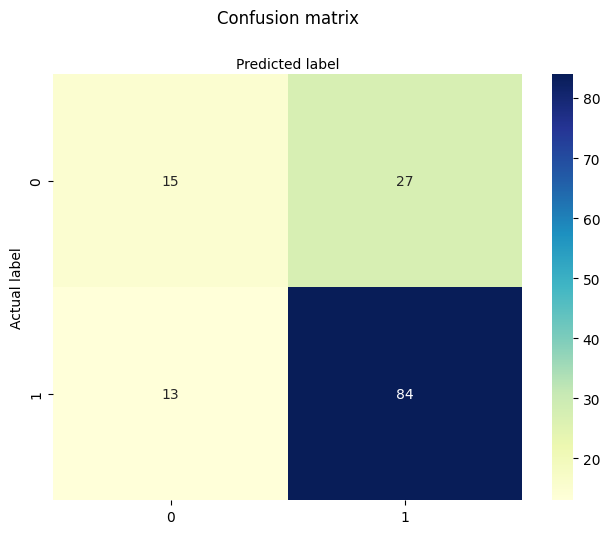

In [414]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Saving the model

In [415]:
pick_in = open('models/Naive Bayes.pkl','wb')
pickle.dump(naive_bayes, pick_in)
pick_in.close()

## Support vector machine model (linear kernel)

In [416]:
sup_vm = svm.SVC(kernel='linear') 
sup_vm.fit(x_train, y_train)
y_pred = sup_vm.predict(x_test)

### Measuring Performance of SVM model

In [417]:
# accuracy on train set
accuracy = sup_vm.score(x_train, y_train)
print(f'Accuracy on train set: {accuracy * 100}%')

Accuracy on train set: 76.144578313253%


In [418]:
# accuracy on test set
accuracy = sup_vm.score(x_test, y_test)
print(f'Accuracy on test set: {accuracy * 100}%')

Accuracy on test set: 75.53956834532374%


### Confusion matrix

Text(0.5, 427.9555555555555, 'Predicted label')

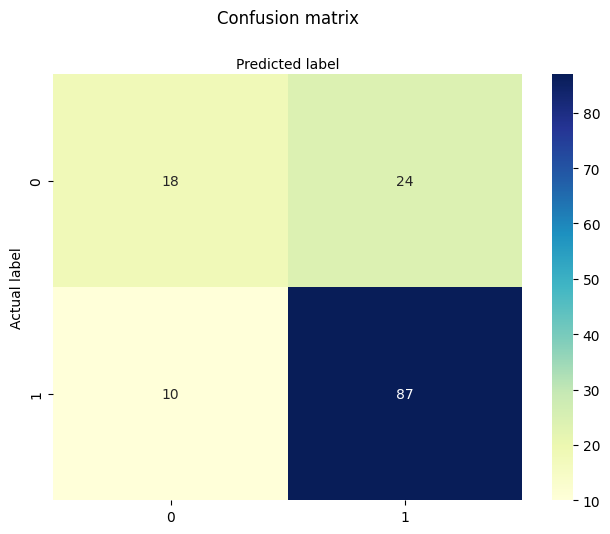

In [419]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Saving the model

In [420]:
pick_in = open('models/SVM.pkl','wb')
pickle.dump(sup_vm, pick_in)
pick_in.close()